Number of records (rows) in the dataset are: 4238
Number of features (columns) in the dataset are: 16
Number of values in the dataset are: 67163
Number missing values in the dataset are: 645
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRa

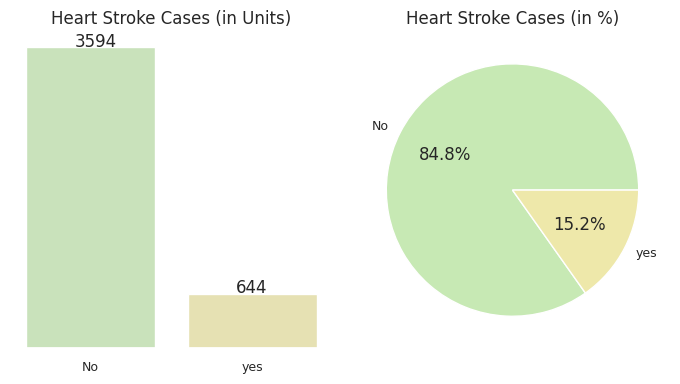

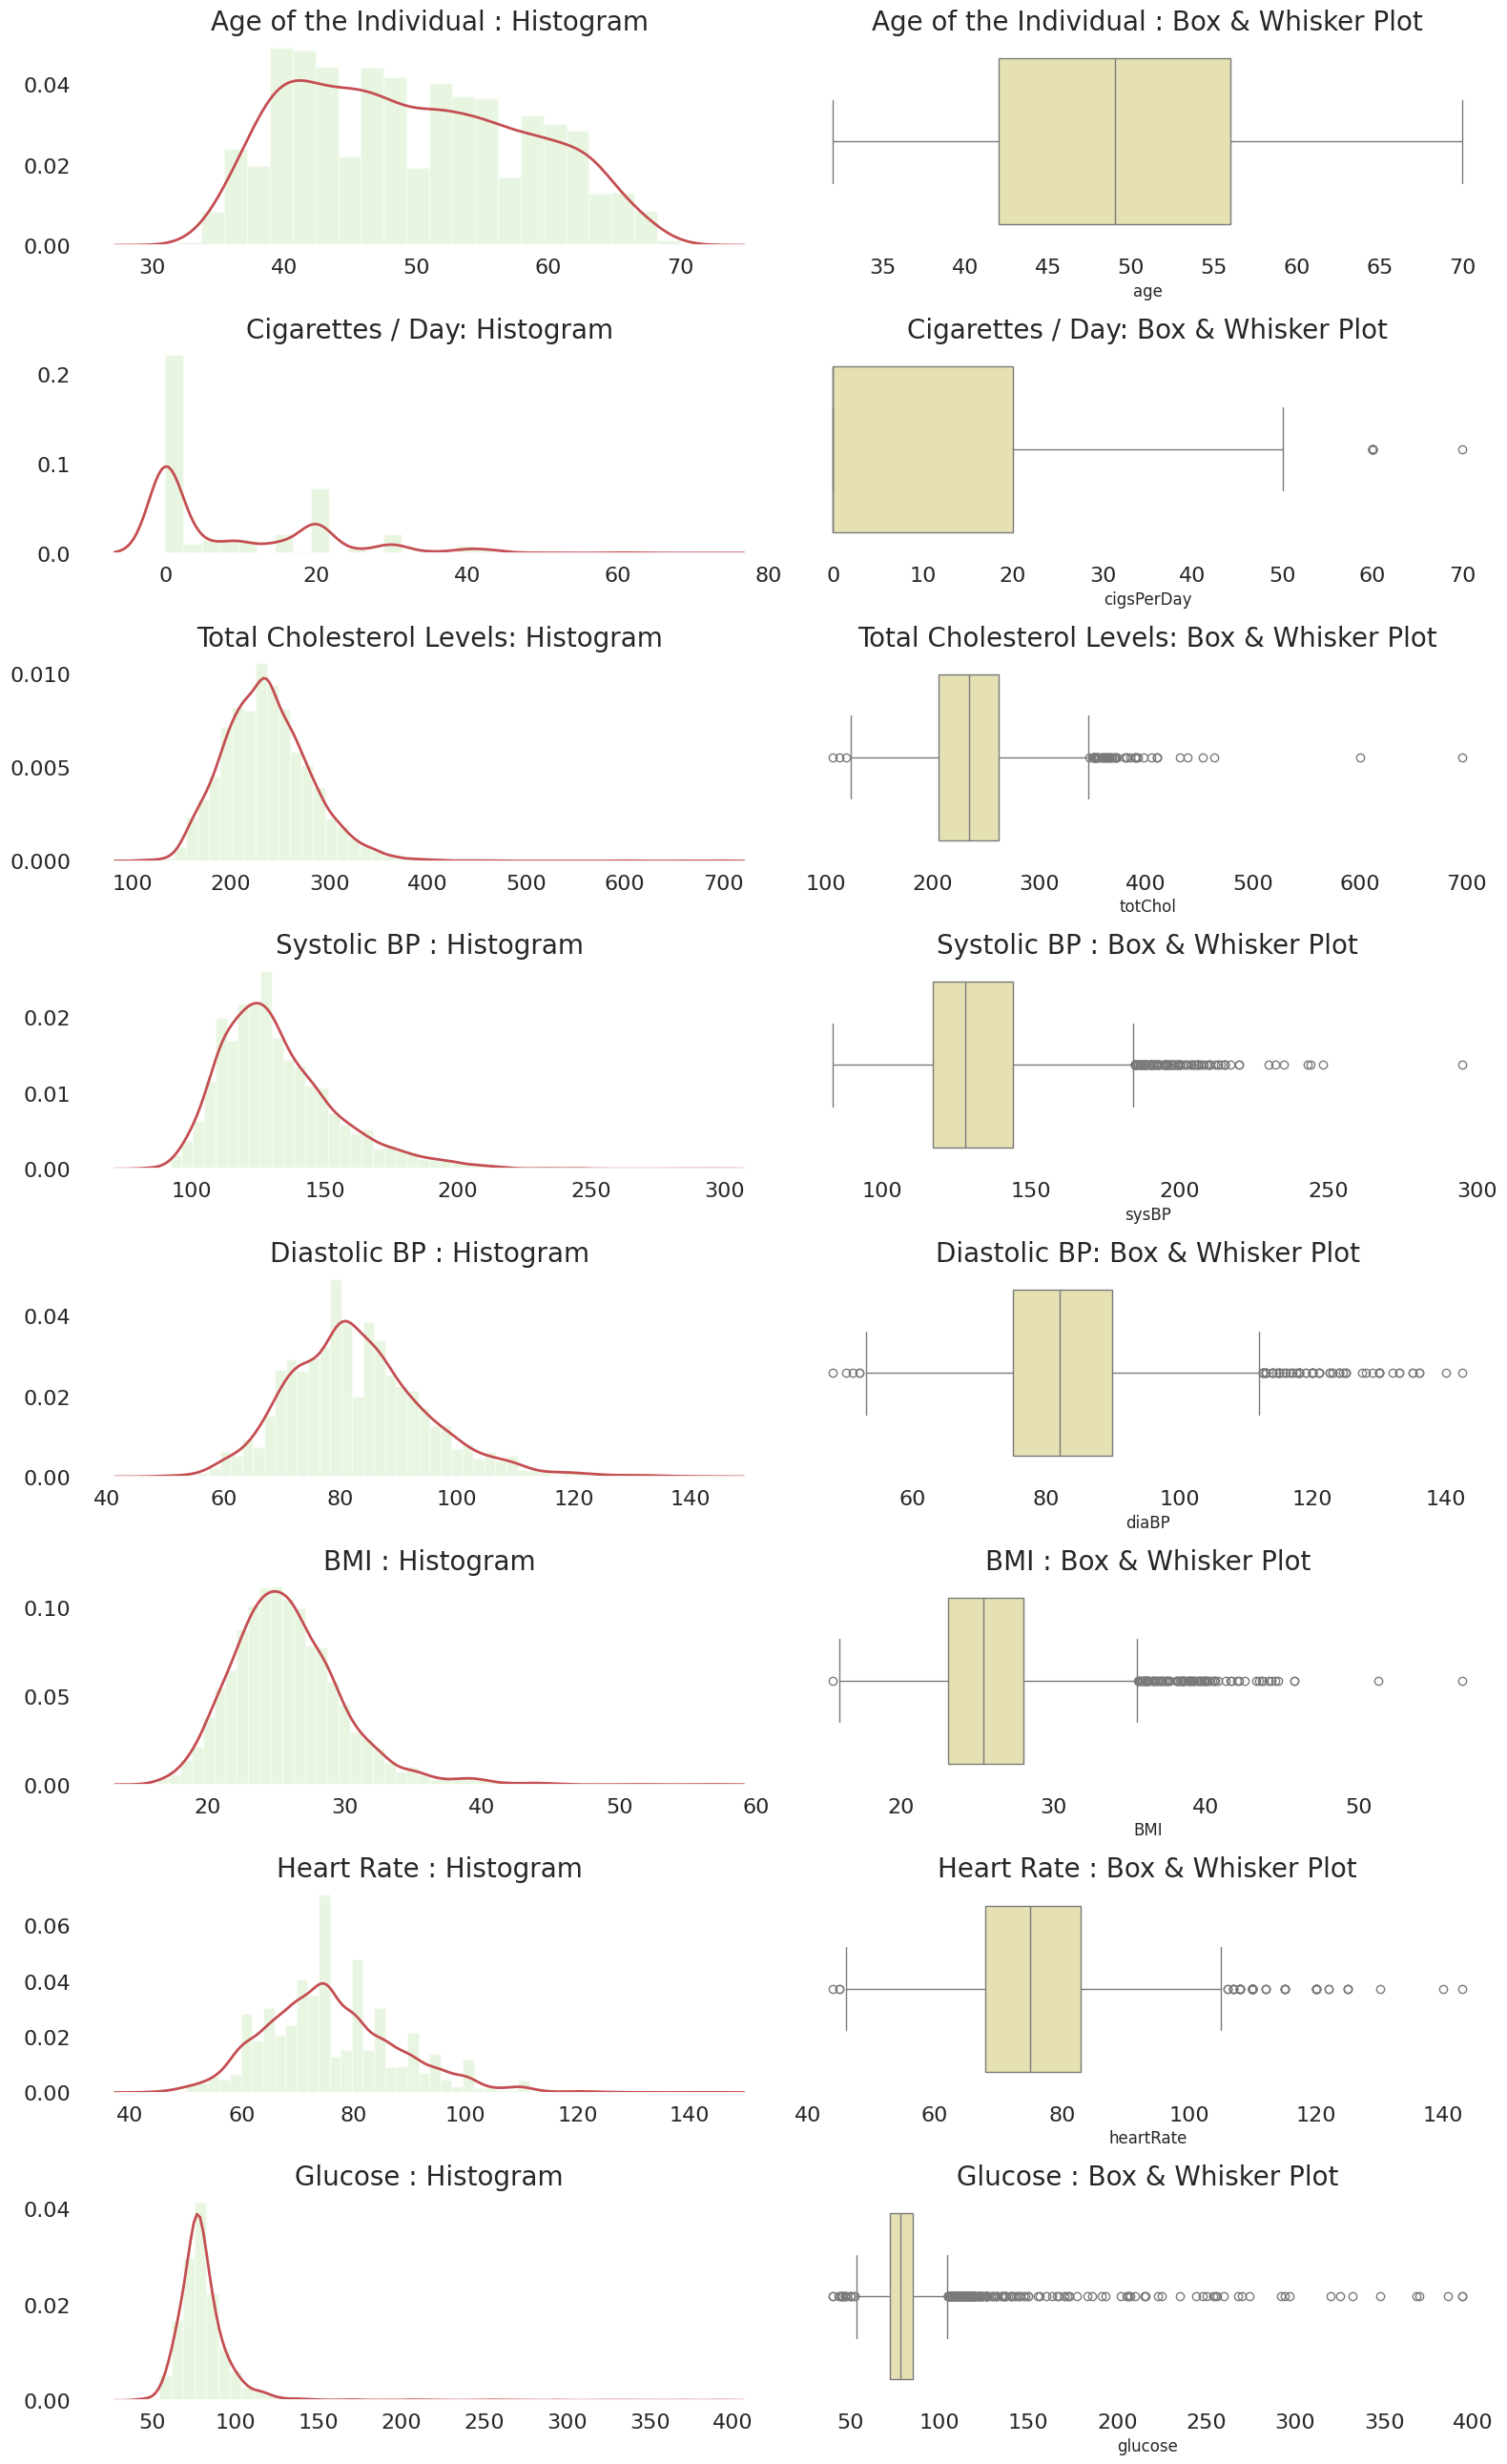

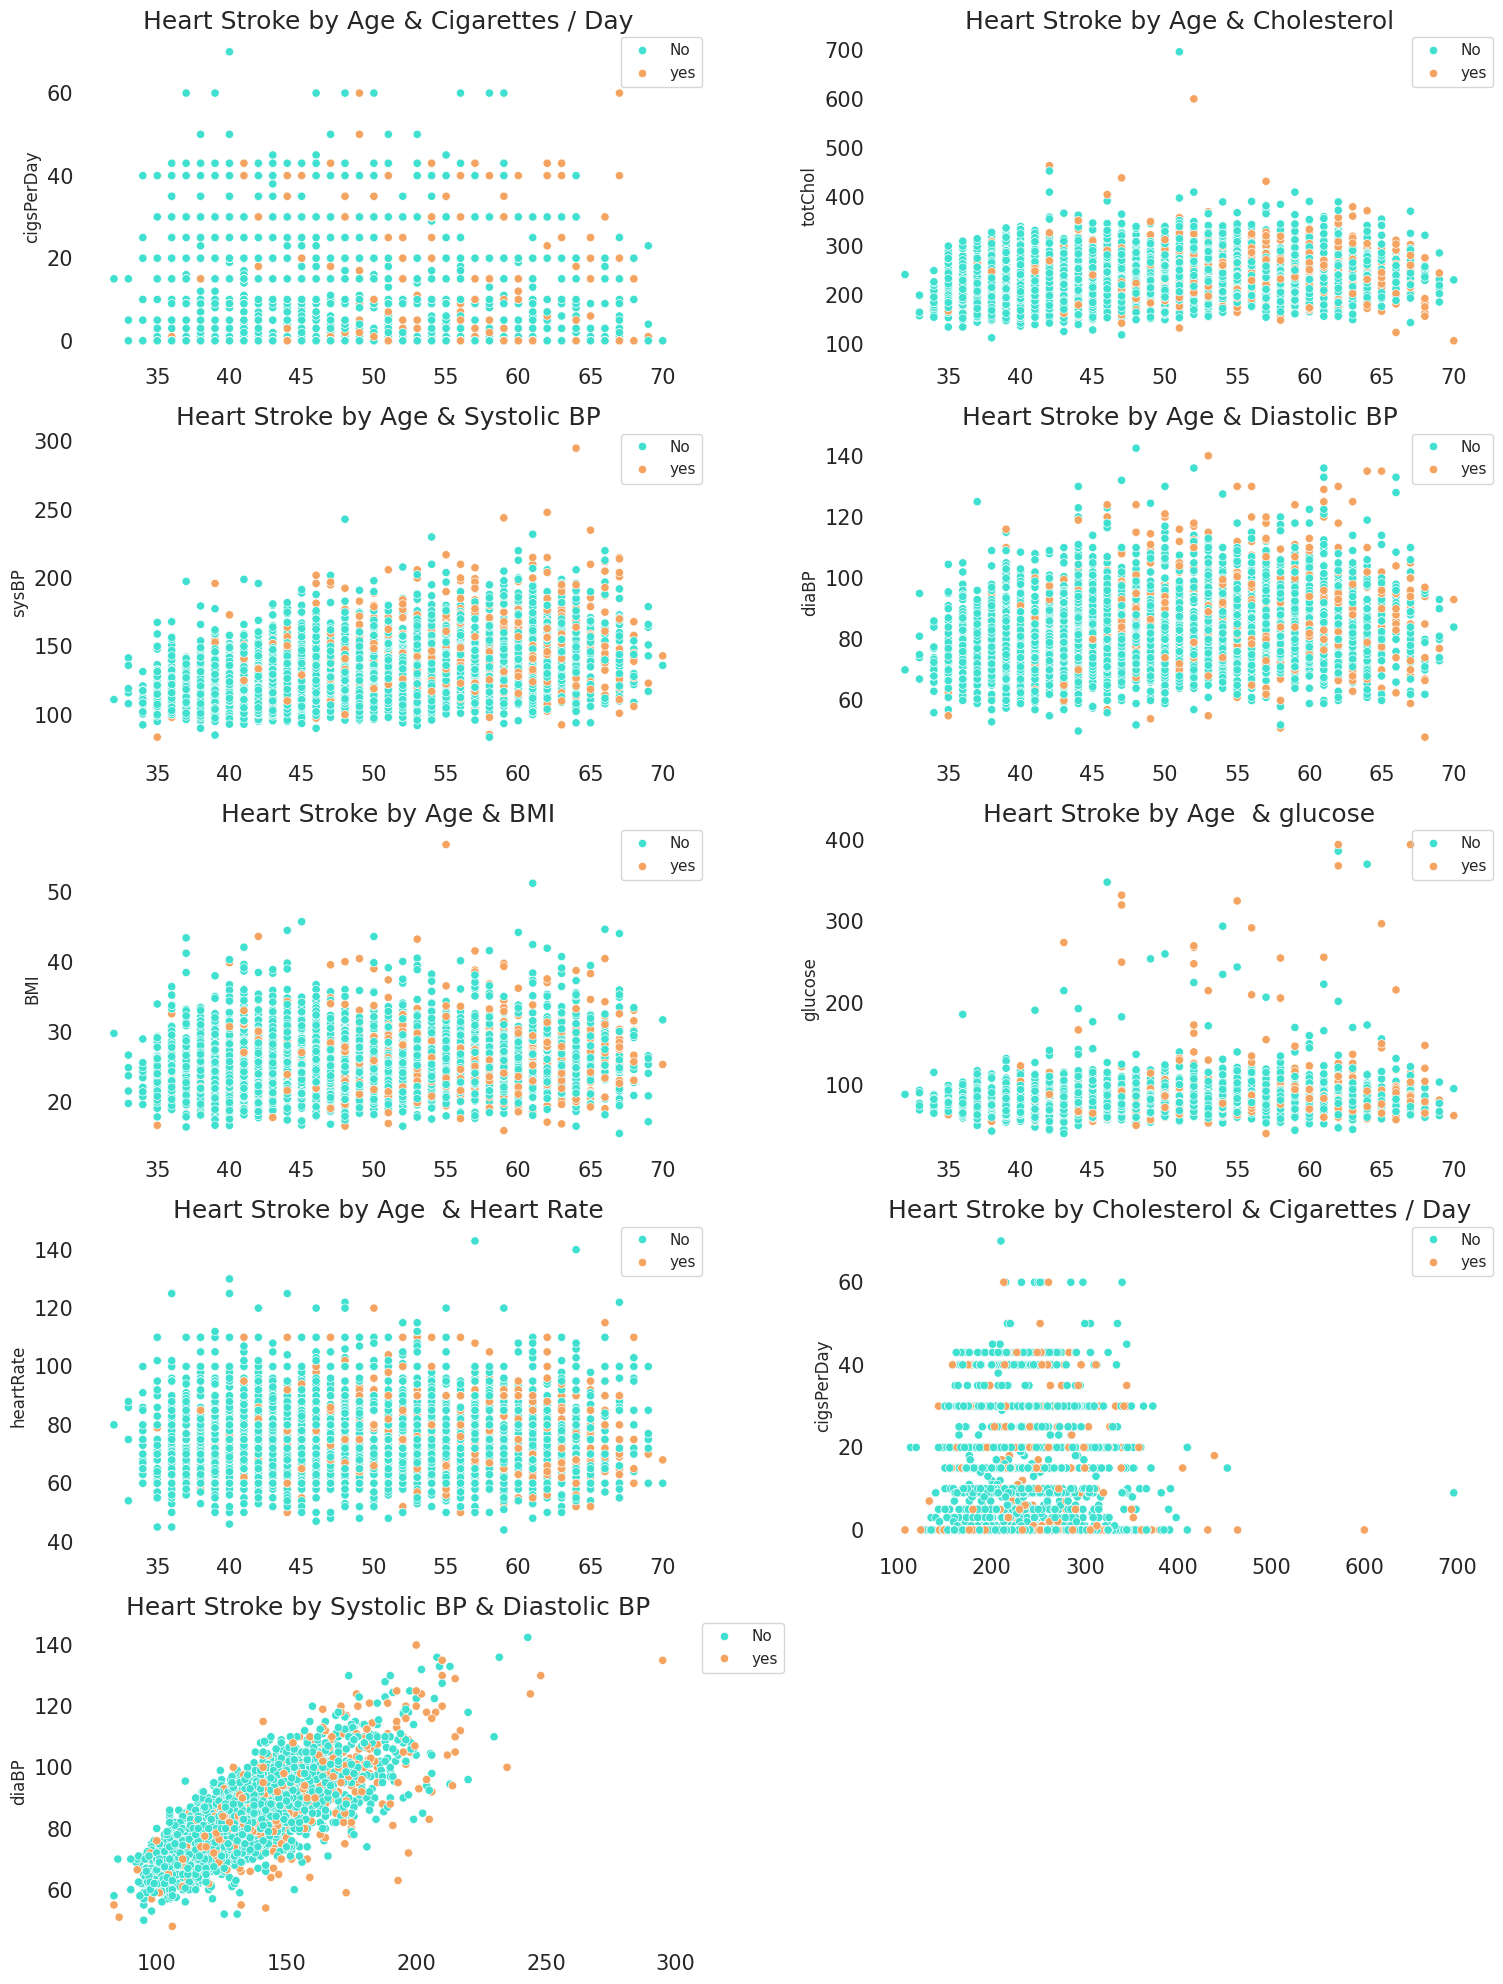

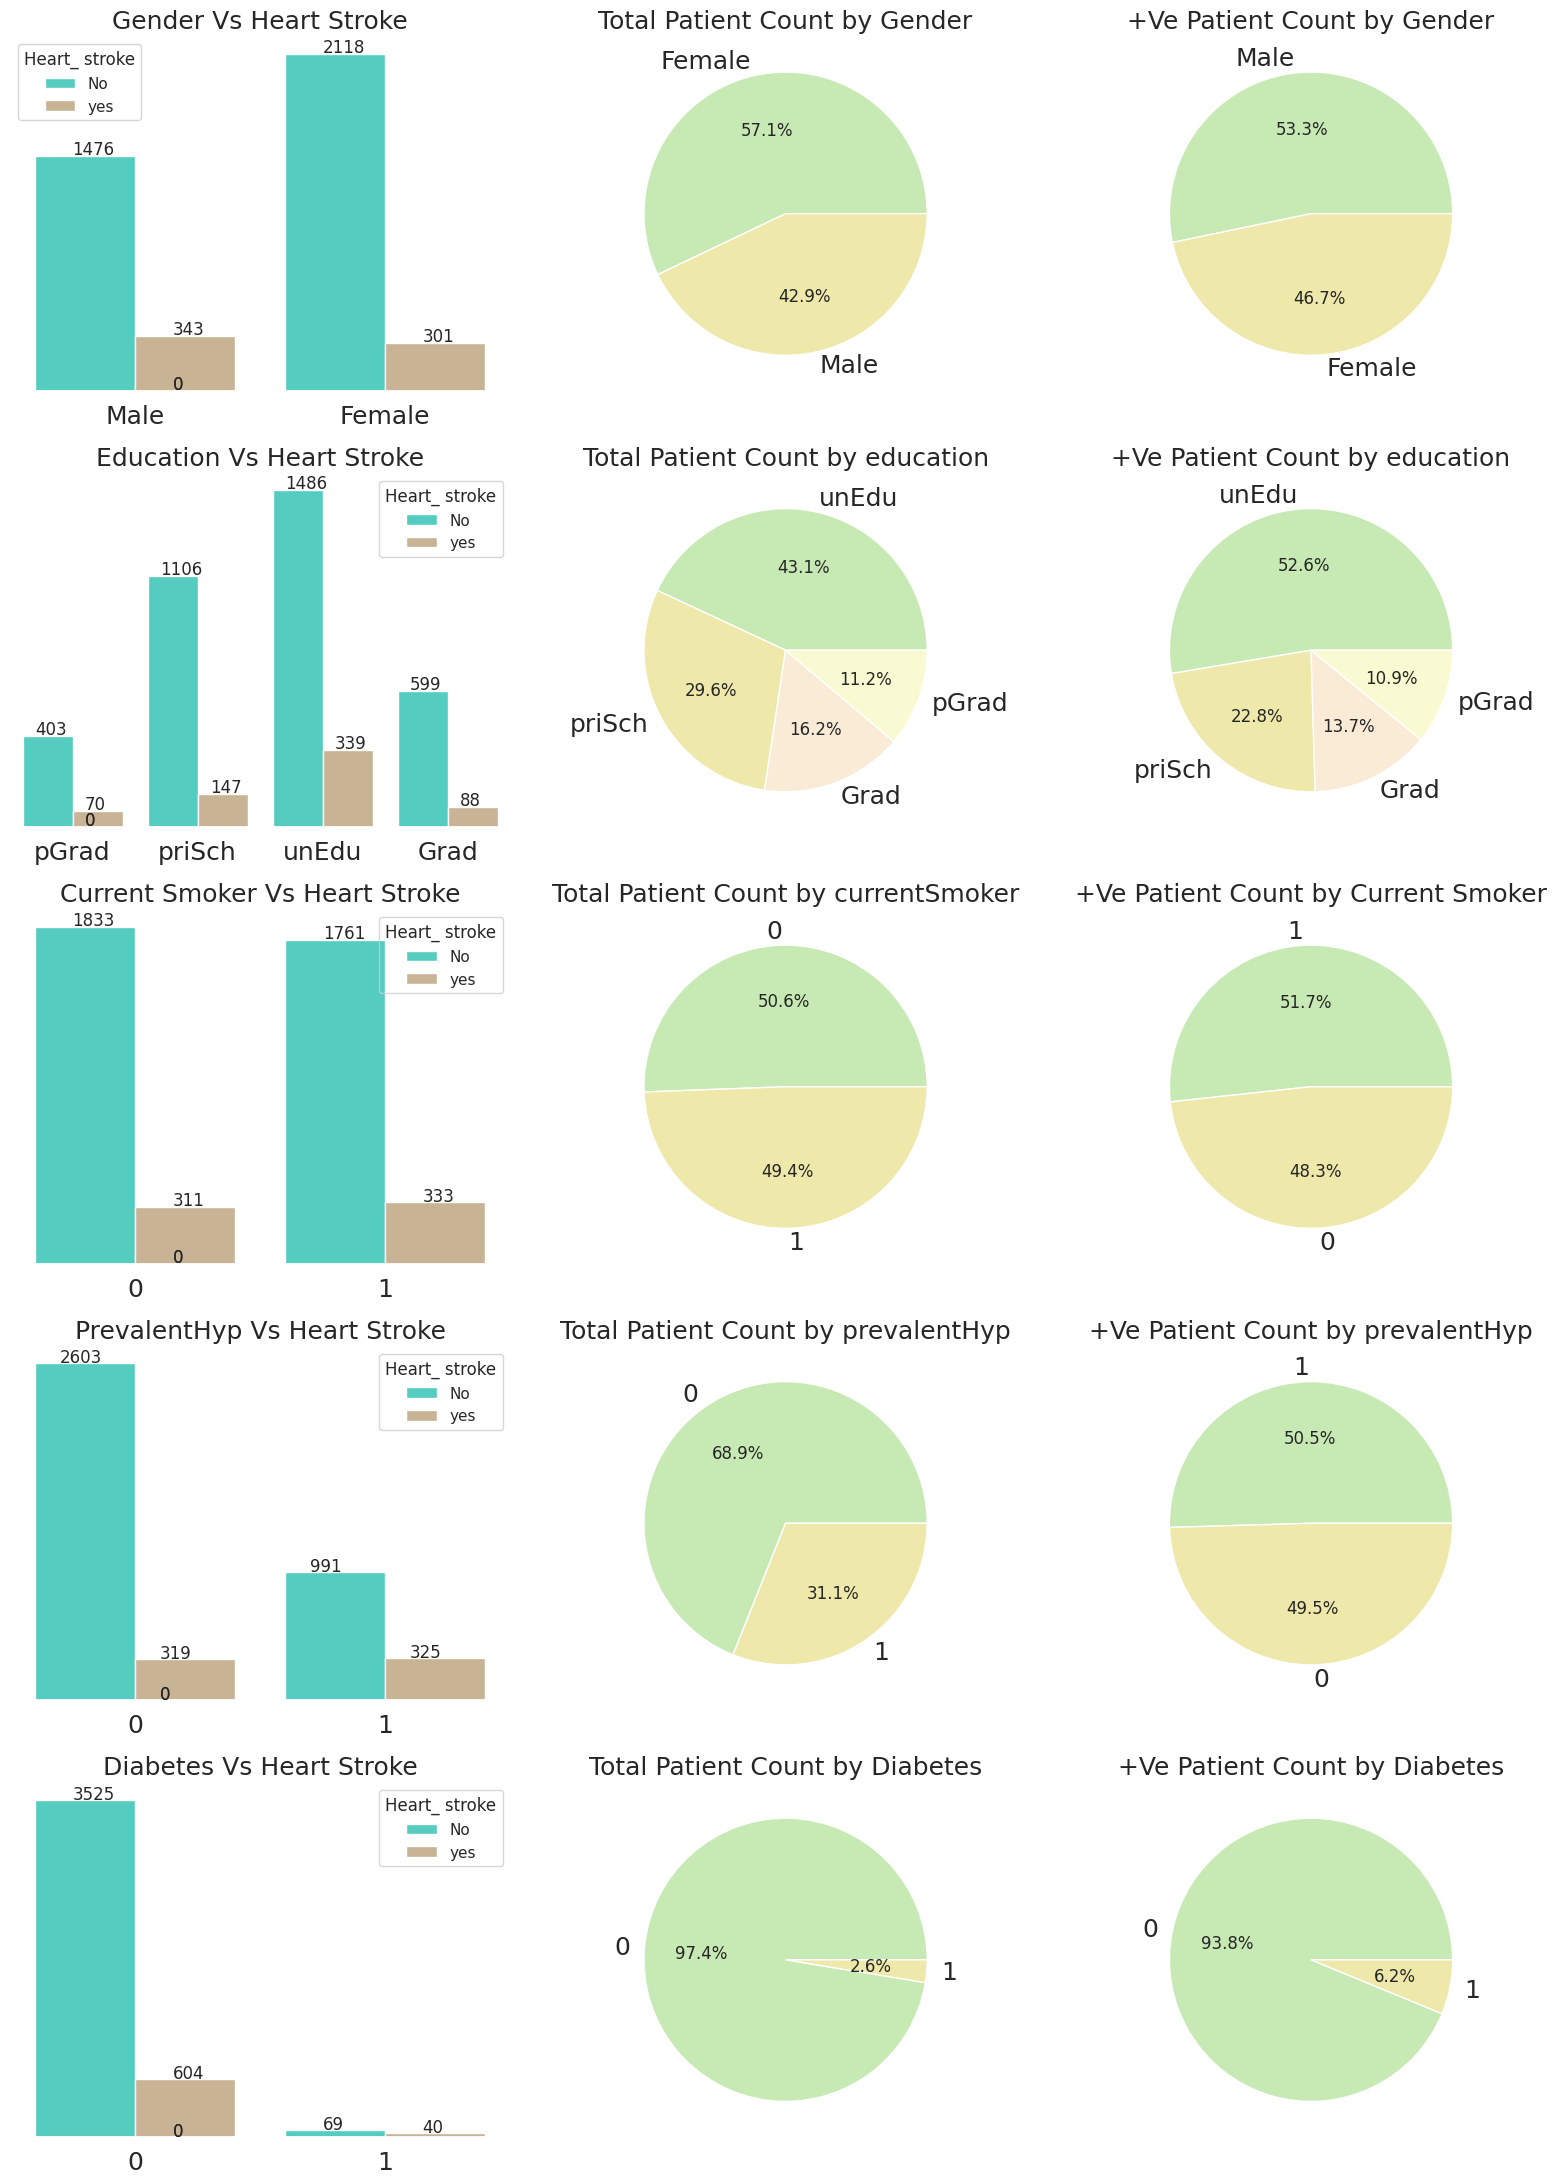

 Train data & Test data shapes 
                X            y
 Train data |  (3390, 10) (3390,) 
 Test data  |  (848, 10) (848,)

KNeighborsClassifier 

Accuracy: 78.89151%
Log Loss: 3.493


AttributeError: 'DataFrame' object has no attribute 'append'

In [5]:
import numpy as np               # linear algebra
import pandas as pd              # data processing, dataset file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # data visualization & graphical plotting
import seaborn as sns            # to visualize random distributions
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

pd.options.display.float_format = '{:.2f}'.format

import warnings                   # to deal with warning messages
warnings.filterwarnings('ignore')

## Load the dataset into environment

df = pd.read_csv ('heart_disease.csv')

## Have a glance at the dataset

df.head(5)

## Checking the shape of the dataset, rows, columns, & missing values

print(f'\033[94mNumber of records (rows) in the dataset are: {df.shape[0]}')
print(f'\033[94mNumber of features (columns) in the dataset are: {df.shape[1]}')
print(f'\033[94mNumber of values in the dataset are: {df.count().sum()}')
print(f'\033[94mNumber missing values in the dataset are: {sum(df.isna().sum())}')

## Determining the null value count by feature

pd.isna(df).sum()[pd.isna(df).sum() > 0]

## Gauge the dataframe to check the feature data types, value count, memory usage etc

df.info()

## Now we proceed with our original plan to remove null values

## Null values in numerical variables

df.glucose.fillna(df.glucose.median(),inplace = True)
df.cigsPerDay.fillna(df.cigsPerDay.median(),inplace = True)
df.totChol.fillna(df.totChol.median(),inplace = True)
df.BMI.fillna(df.BMI.median(),inplace = True)
df.heartRate.fillna(df.heartRate.median(),inplace = True)

## Null values in categorical variables

df.education = df.education.fillna(df.education.mode().iloc[0])
df.BPMeds = df.BPMeds.fillna(df.BPMeds.mode().iloc[0])

## Check whether null values have been removed or not, after treating them

pd.isna(df).sum()[pd.isna(df).sum() > 0]

## Let's check the labels in categorical features

for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())

## Let's rename the education feature labels, to keep them short in visuals

df.replace({'education' : {'postgraduate': 'pGrad', 'primaryschool': 'priSch', 'uneducated' : 'unEdu', 'graduate' : 'Grad'}}, inplace=True)

## Check the modificaiton made

df.education.unique()

## Before proceeding to EDA, let's check the stastical description of th dataframe

df.describe(include='all').T

## Let's have a broader look at Heart Stroke, the target variable in our analysis

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':9,'ytick.labelsize':9, 'figure.autolayout':True})
my_col = ('#c7e9b4', '#EEE8AA')
plt.subplots(figsize=(7,4))

## Heart Stroke Cases (in Units)

plt.subplot(1,2,1)
plt.title('Heart Stroke Cases (in Units)', fontsize=12)
ax = sns.countplot(x="Heart_ stroke", data=df, palette=my_col, order=df['Heart_ stroke'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+8))
plt.ylabel(None), plt.yticks([]), plt.xlabel(None)

## Heart Stroke Cases (in %)

plt.subplot(1,2,2)
plt.title('Heart Stroke Cases (in %)',fontsize=12)
df['Heart_ stroke'].value_counts().plot(kind='pie', colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')

plt.show()

## Let's have a look at the distribtuion in numerical features through histograms and box-whisker plots

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':16,'ytick.labelsize':16, 'figure.autolayout':True})
plt.subplots(figsize=(16,26))

## Age of the Individual

plt.subplot(8,2,1)
plt.title('Age of the Individual : Histogram', fontsize=20)
sns.distplot(df.age, color='#c7e9b4', kde_kws={'linewidth':2,'color':'r'})
plt.ylabel(None), plt.xlabel(None)
plt.subplot(8,2,2)
plt.title('Age of the Individual : Box & Whisker Plot', fontsize=20)
sns.boxplot(df.age, orient="h", color='#EEE8AA')
plt.yticks([])

## Cigarettes / Day

plt.subplot(8,2,3)
plt.title('Cigarettes / Day: Histogram', fontsize=20)
sns.distplot(df.cigsPerDay, color="#c7e9b4", kde_kws={'linewidth':2,'color':'r'})
plt.ylabel(None), plt.xlabel(None)
plt.subplot(8,2,4)
plt.title('Cigarettes / Day: Box & Whisker Plot', fontsize=20)
sns.boxplot(df.cigsPerDay, orient="h", color="#EEE8AA")
plt.yticks([])

## Cholesterol Levels

plt.subplot(8,2,5)
plt.title('Total Cholesterol Levels: Histogram', fontsize=20)
sns.distplot(df.totChol, color="#c7e9b4", kde_kws={'linewidth':2,'color':'r'})
plt.ylabel(None), plt.xlabel(None)
plt.subplot(8,2,6)
plt.title('Total Cholesterol Levels: Box & Whisker Plot', fontsize=20)
sns.boxplot(df.totChol, orient="h", color="#EEE8AA")
plt.yticks([])

## Systolic Blood Pressure

plt.subplot(8,2,7)
plt.title('Systolic BP : Histogram', fontsize=20)
sns.distplot(df.sysBP, color="#c7e9b4", kde_kws={'linewidth':2,'color':'r'})
plt.ylabel(None), plt.xlabel(None)
plt.subplot(8,2,8)
plt.title('Systolic BP : Box & Whisker Plot', fontsize=20)
sns.boxplot(df.sysBP, orient="h", color="#EEE8AA")
plt.yticks([])

## Diastolic Blood Pressure

plt.subplot(8,2,9)
plt.title('Diastolic BP : Histogram', fontsize=20)
sns.distplot(df.diaBP, color="#c7e9b4", kde_kws={'linewidth':2,'color':'r'})
plt.ylabel(None), plt.xlabel(None)
plt.subplot(8,2,10)
plt.title('Diastolic BP: Box & Whisker Plot', fontsize=20)
sns.boxplot(df.diaBP, orient="h", color="#EEE8AA")
plt.yticks([])

## BMI

plt.subplot(8,2,11)
plt.title('BMI : Histogram', fontsize=20)
sns.distplot(df.BMI, color="#c7e9b4", kde_kws={'linewidth':2,'color':'r'})
plt.ylabel(None), plt.xlabel(None)
plt.subplot(8,2,12)
plt.title('BMI : Box & Whisker Plot', fontsize=20)
sns.boxplot(df.BMI, orient="h", color="#EEE8AA")
plt.yticks([])

## Heart Rate

plt.subplot(8,2,13)
plt.title('Heart Rate : Histogram', fontsize=20)
sns.distplot(df.heartRate, color="#c7e9b4", kde_kws={'linewidth':2,'color':'r'})
plt.ylabel(None), plt.xlabel(None)
plt.subplot(8,2,14)
plt.title('Heart Rate : Box & Whisker Plot', fontsize=20)
sns.boxplot(df.heartRate, orient="h", color="#EEE8AA")
plt.yticks([])

## Glucose

plt.subplot(8,2,15)
plt.title('Glucose : Histogram', fontsize=20)
sns.distplot(df.glucose, color="#c7e9b4", kde_kws={'linewidth':2,'color':'r'})
plt.ylabel(None), plt.xlabel(None)
plt.subplot(8,2,16)
plt.title('Glucose : Box & Whisker Plot', fontsize=20)
sns.boxplot(df.glucose, orient="h", color="#EEE8AA");
plt.yticks([])

plt.show()

## Now let's understand the impact of a combination of two numerical variables on Heart Stroke occurence

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':15,'ytick.labelsize':15, 'figure.autolayout':True})
plt.subplots(figsize=(16,20))
my_pal = ("#40E0D0", "#F4A460")

plt.subplot(5,2,1)
plt.title('Heart Stroke by Age & Cigarettes / Day',fontsize=18)
sns.scatterplot(x='age', y='cigsPerDay', hue='Heart_ stroke', palette=my_pal, data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.xlabel(None)

plt.subplot(5,2,2)
plt.title('Heart Stroke by Age & Cholesterol', fontsize=18)
sns.scatterplot(x='age', y='totChol', hue='Heart_ stroke', palette=my_pal, data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.xlabel(None)

plt.subplot(5,2,3)
plt.title('Heart Stroke by Age & Systolic BP', fontsize=18)
sns.scatterplot(x='age', y='sysBP', hue='Heart_ stroke', palette=my_pal, data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.xlabel(None)

plt.subplot(5,2,4)
plt.title('Heart Stroke by Age & Diastolic BP', fontsize=18)
sns.scatterplot(x='age', y='diaBP', hue='Heart_ stroke', palette=my_pal, data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.xlabel(None)

plt.subplot(5,2,5)
plt.title('Heart Stroke by Age & BMI', fontsize=18)
sns.scatterplot(x='age', y='BMI', hue='Heart_ stroke', palette=my_pal, data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.xlabel(None)

plt.subplot(5,2,6)
plt.title('Heart Stroke by Age  & glucose', fontsize=18)
sns.scatterplot(x='age', y='glucose', hue='Heart_ stroke', palette=my_pal, data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.xlabel(None)

plt.subplot(5,2,7)
plt.title('Heart Stroke by Age  & Heart Rate', fontsize=18)
sns.scatterplot(x='age', y='heartRate', hue='Heart_ stroke', palette=my_pal, data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.xlabel(None)

plt.subplot(5,2,8)
plt.title('Heart Stroke by Cholesterol & Cigarettes / Day', fontsize=18)
sns.scatterplot(x='totChol', y='cigsPerDay', hue='Heart_ stroke', palette=my_pal, data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.xlabel(None)

plt.subplot(5,2,9)
plt.title('Heart Stroke by Systolic BP & Diastolic BP', fontsize=18)
sns.scatterplot(x='sysBP', y='diaBP', hue='Heart_ stroke', palette=my_pal, data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.xlabel(None)

plt.show()

## Now let's do some analysis on categorical variables and their impact on Heart Stroke

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':18,'ytick.labelsize':18, 'figure.autolayout':True})
my_col = ('#40E0D0', '#D2B48C')
my_pal = ('#c7e9b4', '#EEE8AA', '#FAEBD7', '#FAFAD2','#F08080', '#F4A460')
plt.subplots(figsize=(16,26))

##  Gender

plt.subplot(6,3,1)
plt.title('Gender Vs Heart Stroke',fontsize=18)
ax = sns.countplot(x='Gender', hue='Heart_ stroke', palette=my_col, data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+8))
plt.ylabel(None), plt.yticks([]), plt.xlabel(None)
plt.subplot(6,3,2)
plt.title('Total Patient Count by Gender', fontsize=18)
df['Gender'].value_counts().plot(kind='pie', subplots=True, colors =my_pal, legend=None, ylabel='', autopct='%1.1f%%')
plt.subplot(6,3,3)
plt.title('+Ve Patient Count by Gender', fontsize=18)
df[df['Heart_ stroke'] == "yes"]['Gender'].value_counts().plot(kind='pie', subplots=True, colors = my_pal, legend=None, ylabel='', autopct='%1.1f%%')

## education

plt.subplot(6,3,4)
plt.title('Education Vs Heart Stroke', fontsize=18)
ax = sns.countplot(x='education', hue='Heart_ stroke', palette=my_col, data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+8))
plt.ylabel(None), plt.yticks([]), plt.xlabel(None)
plt.subplot(6,3,5)
plt.title('Total Patient Count by education', fontsize=18)
df['education'].value_counts().plot(kind='pie', subplots=True, colors = my_pal, legend=None, ylabel='', autopct='%1.1f%%'),
plt.subplot(6,3,6)
plt.title('+Ve Patient Count by education', fontsize=18)
df[df['Heart_ stroke'] == "yes"]['education'].value_counts().plot(kind='pie', subplots=True, colors = my_pal, legend=None, ylabel='', autopct='%1.1f%%')

## Current Smoker

plt.subplot(6,3,7)
plt.title('Current Smoker Vs Heart Stroke', fontsize=18)
ax = sns.countplot(x='currentSmoker', hue='Heart_ stroke', palette=my_col, data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+8))
plt.ylabel(None), plt.yticks([]), plt.xlabel(None)
plt.subplot(6,3,8)
plt.title('Total Patient Count by currentSmoker', fontsize=18)
df['currentSmoker'].value_counts().plot(kind='pie', subplots=True, colors = my_pal, legend=None, ylabel='', autopct='%1.1f%%')
plt.subplot(6,3,9)
plt.title('+Ve Patient Count by Current Smoker', fontsize=18)
df[df['Heart_ stroke'] == "yes"]['currentSmoker'].value_counts().plot(kind='pie', subplots=True, colors = my_pal, legend=None, ylabel='', autopct='%1.1f%%')

## Hypertension

plt.subplot(6,3,10)
plt.title('PrevalentHyp Vs Heart Stroke', fontsize=18)
ax = sns.countplot(x='prevalentHyp', hue='Heart_ stroke', palette=my_col, data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.10, p.get_height()+8))
plt.ylabel(None), plt.yticks([]), plt.xlabel(None)
plt.subplot(6,3,11)
plt.title('Total Patient Count by prevalentHyp', fontsize=18)
df['prevalentHyp'].value_counts().plot(kind='pie', subplots=True, colors = my_pal, legend=None, ylabel='', autopct='%1.1f%%')
plt.subplot(6,3,12)
plt.title('+Ve Patient Count by prevalentHyp', fontsize=18)
df[df['Heart_ stroke'] == "yes"]['prevalentHyp'].value_counts().plot(kind='pie', subplots=True, colors = my_pal, legend=None, ylabel='', autopct='%1.1f%%')

## diabetes

plt.subplot(6,3,13)
plt.title('Diabetes Vs Heart Stroke', fontsize=18)
ax = sns.countplot(x='diabetes', hue='Heart_ stroke', palette=my_col, data=df)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+8))
plt.ylabel(None), plt.yticks([]), plt.xlabel(None)
plt.subplot(6,3,14)
plt.title('Total Patient Count by Diabetes', fontsize=18)
df['diabetes'].value_counts().plot(kind='pie', subplots=True, colors = my_pal, legend=None, ylabel='', autopct='%1.1f%%')
plt.subplot(6,3,15)
plt.title('+Ve Patient Count by Diabetes', fontsize=18)
df[df['Heart_ stroke'] == "yes"]['diabetes'].value_counts().plot(kind='pie', subplots=True, colors = my_pal, legend=None, ylabel='', autopct='%1.1f%%')

plt.show()

##label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder ()

#select ctegorical columns
cat_df = df.select_dtypes(exclude=["int", "float"])

for i in cat_df:
    cat_df[i] = le.fit_transform(df[i])

#joining the data to the numeric data
num_df = df.select_dtypes(include=['int', 'float'])
main_df = pd.concat([num_df, cat_df], axis=1)
main_df.head(5)

##  Scaling the Data

## For features with normal distribution, we use Standardisation with StandardScaler
## For features with skewed distribution, we use Normalisation with MinMaxscaler
## So first we'll have a glance at skewness of features before proceeding with scaling

main_df.skew(axis = 0)

## Now we continue with scaling process

stdsca = StandardScaler() # Standardization
minmaxsca = MinMaxScaler() # Normalization

main_df['age'] = stdsca.fit_transform(main_df[['age']])
main_df['prevalentHyp'] = stdsca.fit_transform(main_df[['prevalentHyp']])
main_df['totChol'] = stdsca.fit_transform(main_df[['totChol']])
main_df['diaBP'] = stdsca.fit_transform(main_df[['diaBP']])
main_df['BMI'] = stdsca.fit_transform(main_df[['BMI']])
main_df['heartRate'] = stdsca.fit_transform(main_df[['heartRate']])

main_df['cigsPerDay'] = minmaxsca.fit_transform(main_df[['cigsPerDay']])
main_df['BPMeds'] = minmaxsca.fit_transform(main_df[['BPMeds']])
main_df['diabetes'] = minmaxsca.fit_transform(main_df[['diabetes']])
main_df['sysBP'] = minmaxsca.fit_transform(main_df[['sysBP']])
main_df['glucose'] = minmaxsca.fit_transform(main_df[['glucose']])
main_df['prevalentStroke'] = minmaxsca.fit_transform(main_df[['prevalentStroke']])

main_df.head()

## Now we check the corrleation of features with the target variable (Heart Stroke)

corr_matrix = main_df.corr()
corr_matrix['Heart_ stroke'].sort_values(ascending=False)

## Segregating the Dependent Variable in Y-axis and Independent Variables in X-axis
## Besigdes segregating X & Y-axis variables, we'll remove some insignificant features too.

X = main_df.drop(columns=["Heart_ stroke", "currentSmoker", "heartRate", "education", "cigsPerDay", "prevalentStroke"])
y = main_df["Heart_ stroke"]

## Scaling the data

scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

## Splitting the Data

## We split the data into train & test sets in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0, stratify=y)

print('='*34, '\n', f'\033[94mTrain data & Test data shapes', '\n', f'\033[94m '*14, f'\033[94mX            y')
print('='*34, '\n', f'\033[94mTrain data | ', X_train.shape, y_train.shape, '\n', f'\033[94mTest data  | ', X_test.shape, y_test.shape)

## Defining & running the Classifier Models

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LogisticRegression(),
    XGBClassifier()]

# Logging for Visual Comparison

log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    print(f'\033[94m='*30, '\n')
    print(name, '\n')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.5%}".format(acc))

    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {:.5}".format(ll))

    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

print(f'\033[94m='*30)

## Visualising the data with bar charts

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':14,'ytick.labelsize':14, 'figure.autolayout':True})
plt.subplots(figsize=(12,6))

plt.subplot(1,2,1)
sns.set_color_codes("bright")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="turquoise")
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy', fontsize=14)
plt.ylabel(None)

plt.subplot(1,2,2)
sns.set_color_codes("bright")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="palegoldenrod")
plt.xlabel('Log Loss')
plt.title('Classifier Log Loss', fontsize=14)
plt.ylabel(None)

plt.show()

## Let's build confusion matrix for LogisticRegression
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':11,'ytick.labelsize':11, 'figure.autolayout':True})

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_Log_Reg_training_set = clf.predict(X_train)
acc_Log_Reg = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_Log_Reg)

class_names = ['No', 'yes']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_Log_Reg_training_set)
np.set_printoptions(precision=2)

print ('Confusion Matrix (Values)')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('\n', 'Confusion Matrix (%)')
print (cnf_matrix_percent)
print ('')

true_class_names = ['Tru_NoHtStr', 'Tru_YesHtStr']
predicted_class_names = ['Pred_NoHtStr', 'Pred_YesHtStr']

df_cnf_matrix = pd.DataFrame(cnf_matrix,
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent,
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (8,3))

plt.subplot(1,2,1)
plt.title("Confusion Matrix (Values)",fontsize=12)
sns.heatmap(df_cnf_matrix, cmap="Greens_r", annot=True, fmt='d')

plt.subplot(1,2,2)
plt.title("Confusion Matrix (%)", fontsize=12)
sns.heatmap(df_cnf_matrix_percent, cmap="Greens_r", annot=True)

plt.show()

## Prepare a classification report with LogisticRegression data

y_pred_ = clf.predict(X_test)

print(classification_report(y_test, y_pred_))